In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
df_train=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_test=pd.read_csv('/content/DailyDelhiClimateTest.csv')
df=df_train

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
len(df_test)

114

In [5]:
len(df)

1462

In [6]:
df_train=df_train.rename(columns={'meantemp':'y','date':'ds'})
df_train['y_orig']=df_train['y']
df_train['y']=np.log(df_train['y'])

In [7]:
model=Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_data=model.make_future_dataframe(periods=113,freq='D')
forecast_data=model.predict(future_data)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.553277,3.425213,3.674863
1571,2017-04-21,3.557053,3.439358,3.677678
1572,2017-04-22,3.557335,3.433400,3.681024
1573,2017-04-23,3.556707,3.424558,3.668934
1574,2017-04-24,3.573969,3.442395,3.695685


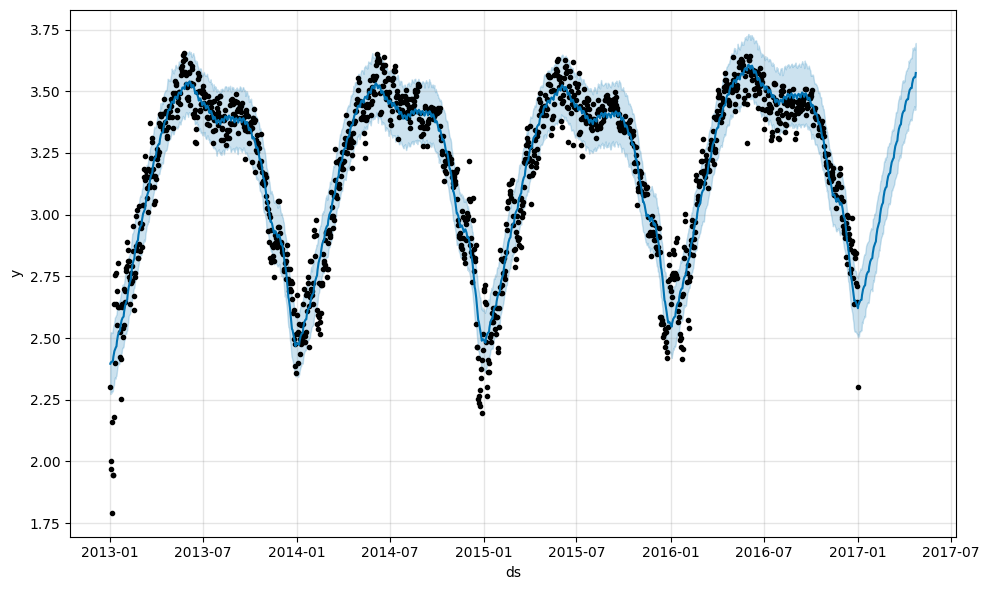

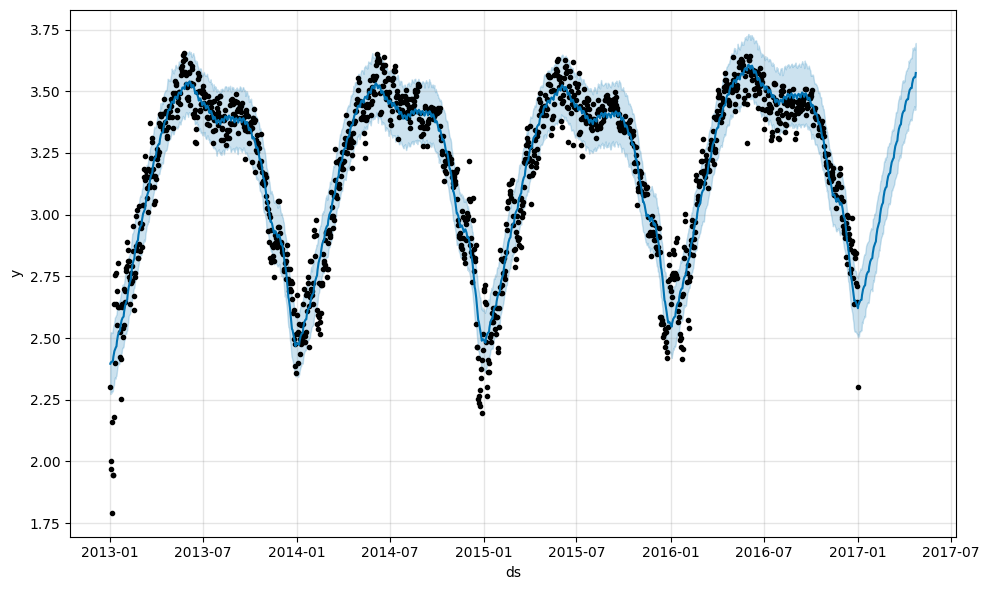

In [10]:
model.plot(forecast_data)

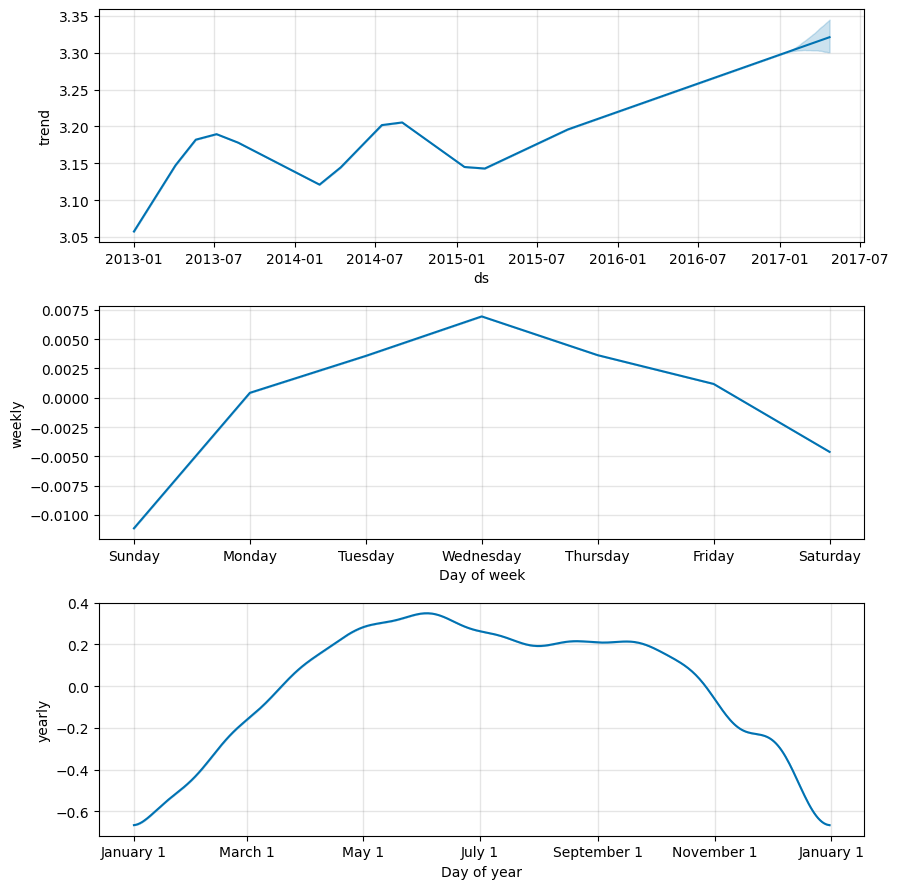

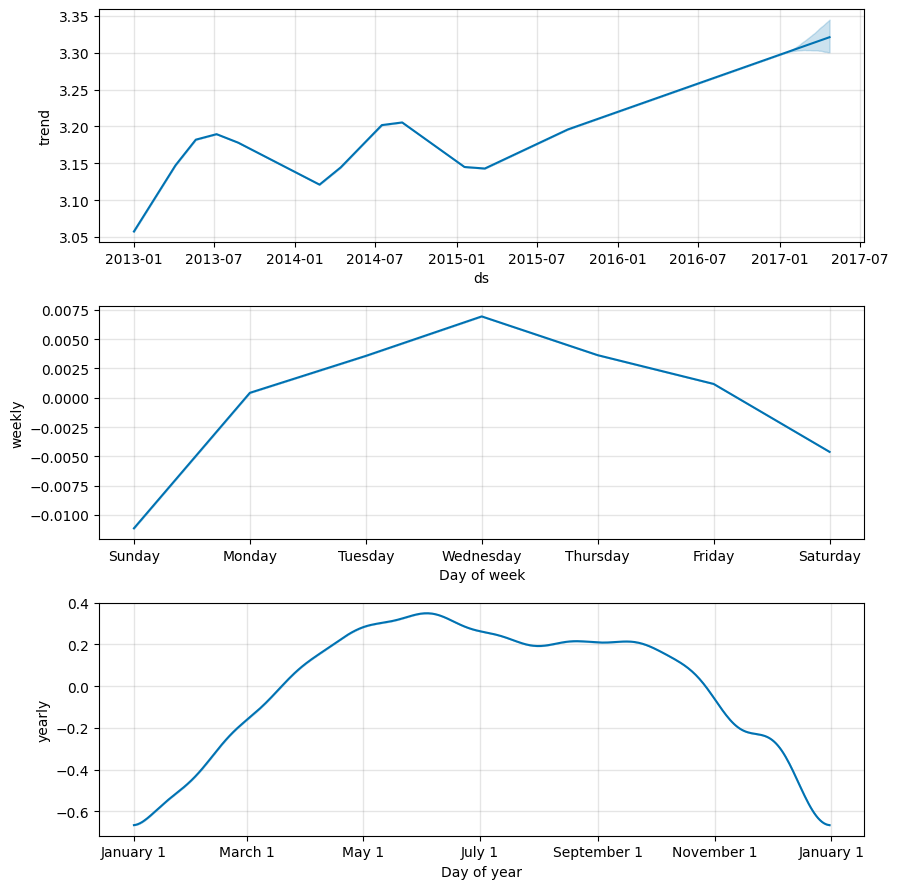

In [11]:
model.plot_components(forecast_data)

In [12]:
forecast_data_orig=forecast_data
forecast_data_orig['yhat']=np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower']=np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper']=np.exp(forecast_data_orig['yhat_upper'])

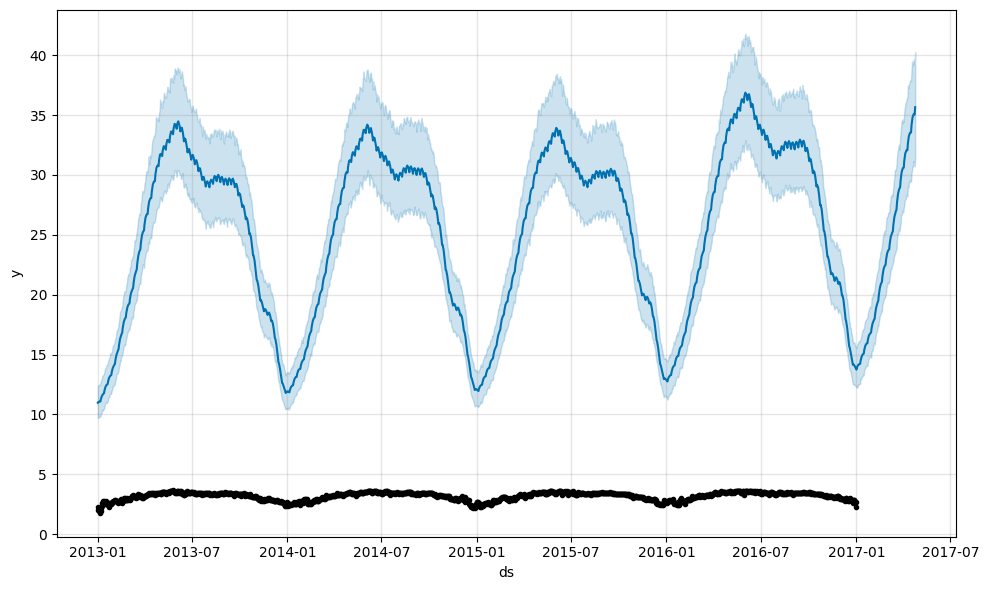

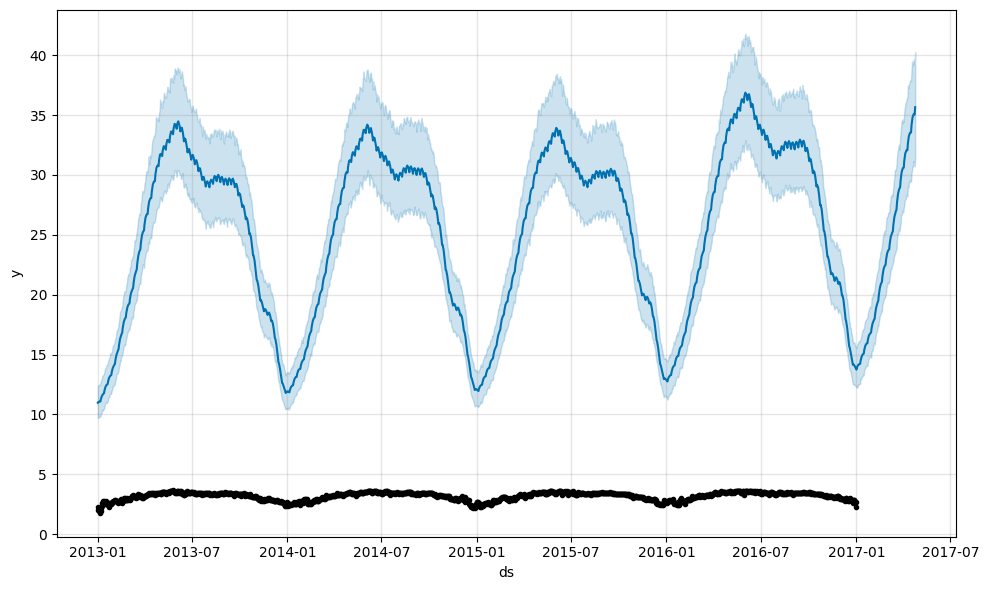

In [13]:
model.plot(forecast_data_orig)

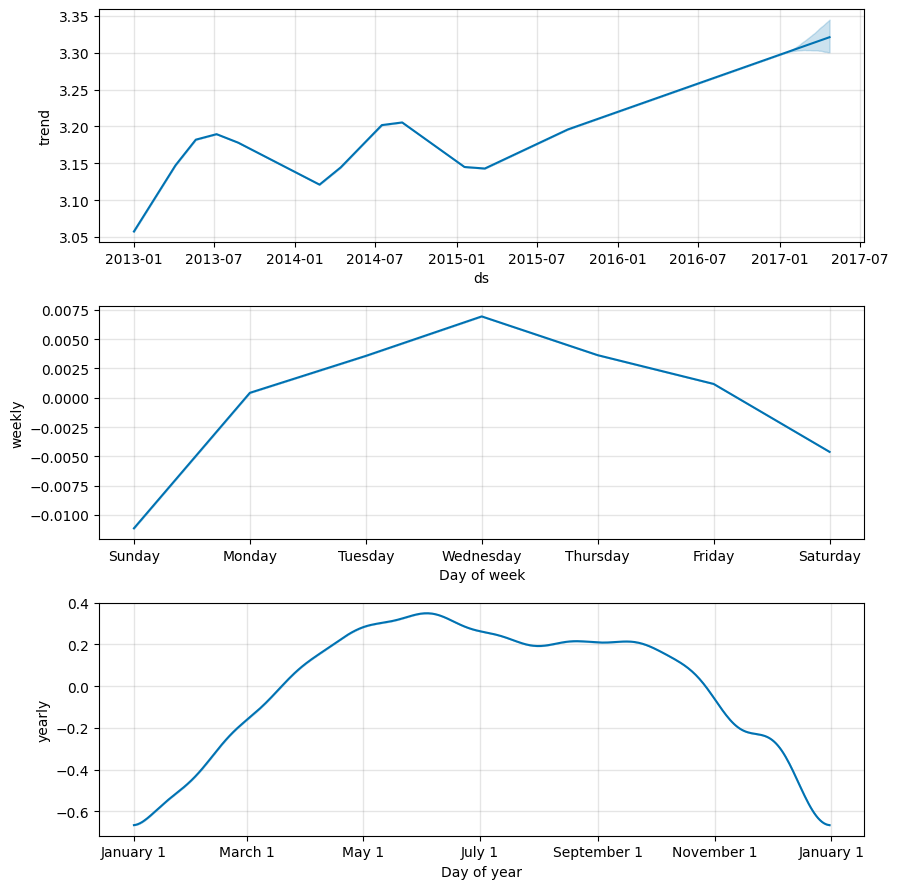

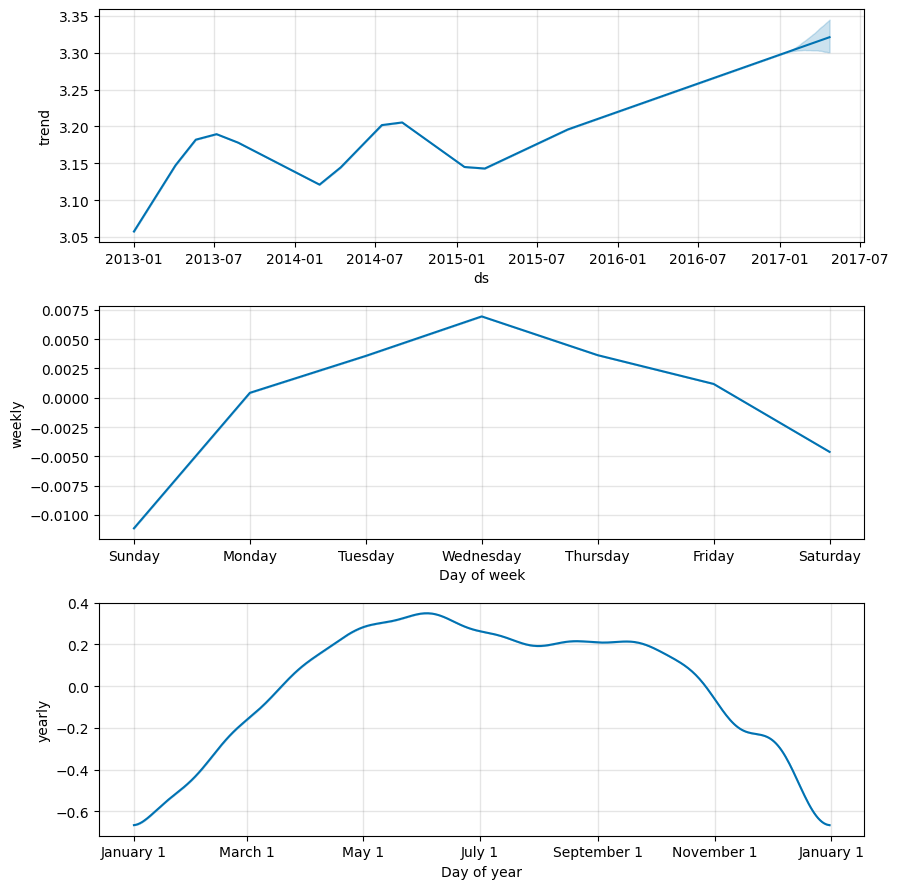

In [14]:
model.plot_components(forecast_data_orig)

In [15]:
df_train['y_log']=df_train['y']
df_train['y']=df_train['y_orig']

In [19]:
final_df=pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py

actual_chart=go.Scatter(y=df_train["y_orig"],name='Actual')
predicted_chart=go.Scatter(y=final_df["yhat"],name='Predicted')
predict_chart_upper=go.Scatter(y=final_df["yhat_upper"],name='Predicted Upper')
predict_chart_lower=go.Scatter(y=final_df["yhat_lower"],name='Predicted Lower')
py.plot([actual_chart,predicted_chart,predict_chart_upper,predict_chart_lower])

'temp-plot.html'

In [20]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [23]:
rows=final_df['yhat'].tail(113)

In [24]:
rows=rows.reset_index()

In [25]:
rows.pop('index')

,index
0,1462
1,1463
2,1464
3,1465
4,1466
...,...
108,1570
109,1571
110,1572
111,1573


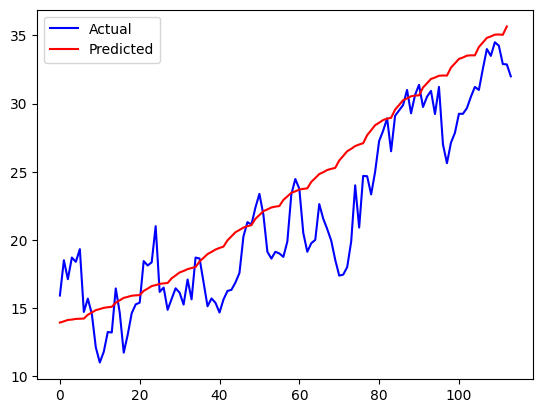

In [26]:
plt.plot(df_test['meantemp'],label='Actual',color='blue')
plt.plot(rows,label='Predicted',color='red')
plt.legend()
plt.show()

## MULTI VARIATE

In [27]:
df_train=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_test=pd.read_csv('/content/DailyDelhiClimateTest.csv')
df=df_train

In [28]:
df_train=df_train.rename(columns={'meantemp':'y','date':'ds'})
df_train['y_orig']=df_train['y']
df_train['y']=np.log(df_train['y'])

model_new=Prophet()
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [29]:
model_new.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future_data_new=model_new.make_future_dataframe(periods=113,freq='D')

In [32]:
df=pd.concat([df, df_test])
df=df.rename(columns={'mentemp':'y','date':'ds'})
future_data_new=df[['ds','humidity','wind_speed','meanpressure']]

In [33]:
forecast_data_new=model_new.predict(future_data_new)
forecast_data_new[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.573404,3.465333,3.688804
1572,2017-04-21,3.521899,3.421005,3.629283
1573,2017-04-22,3.517833,3.406186,3.625480
1574,2017-04-23,3.577378,3.473121,3.683989
1575,2017-04-24,3.588266,3.484344,3.695788


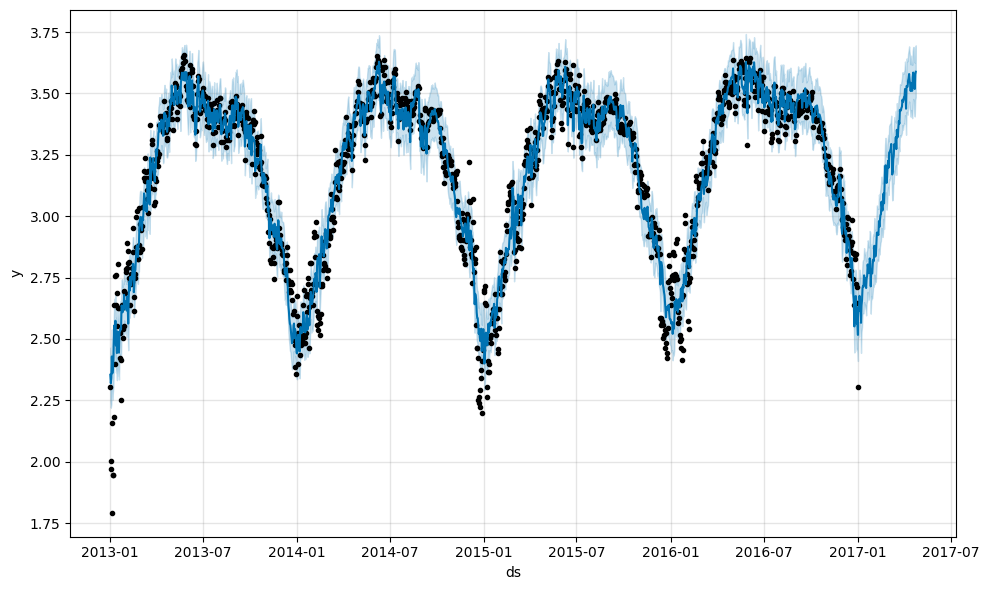

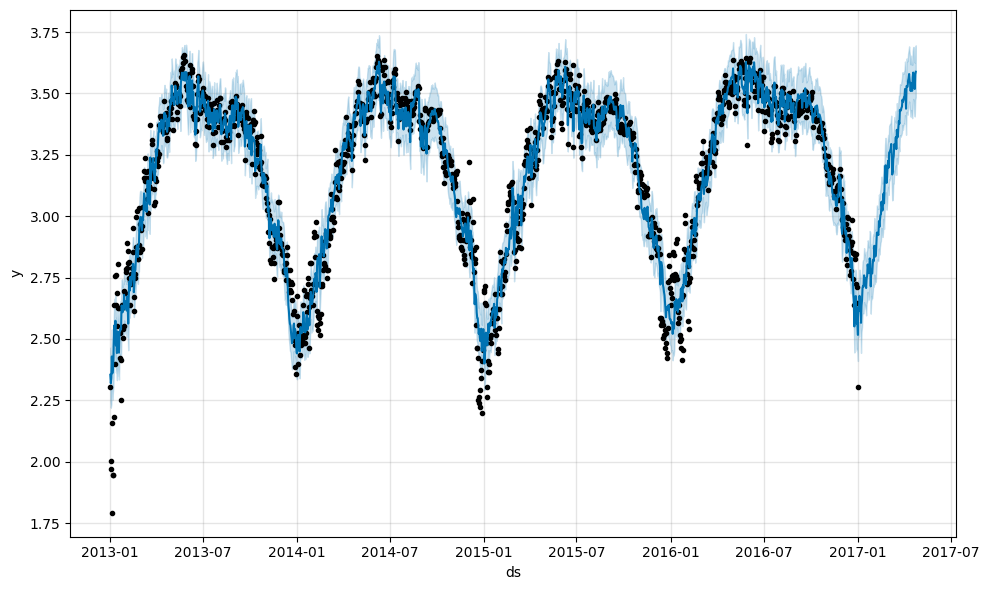

In [34]:
model.plot(forecast_data_new)

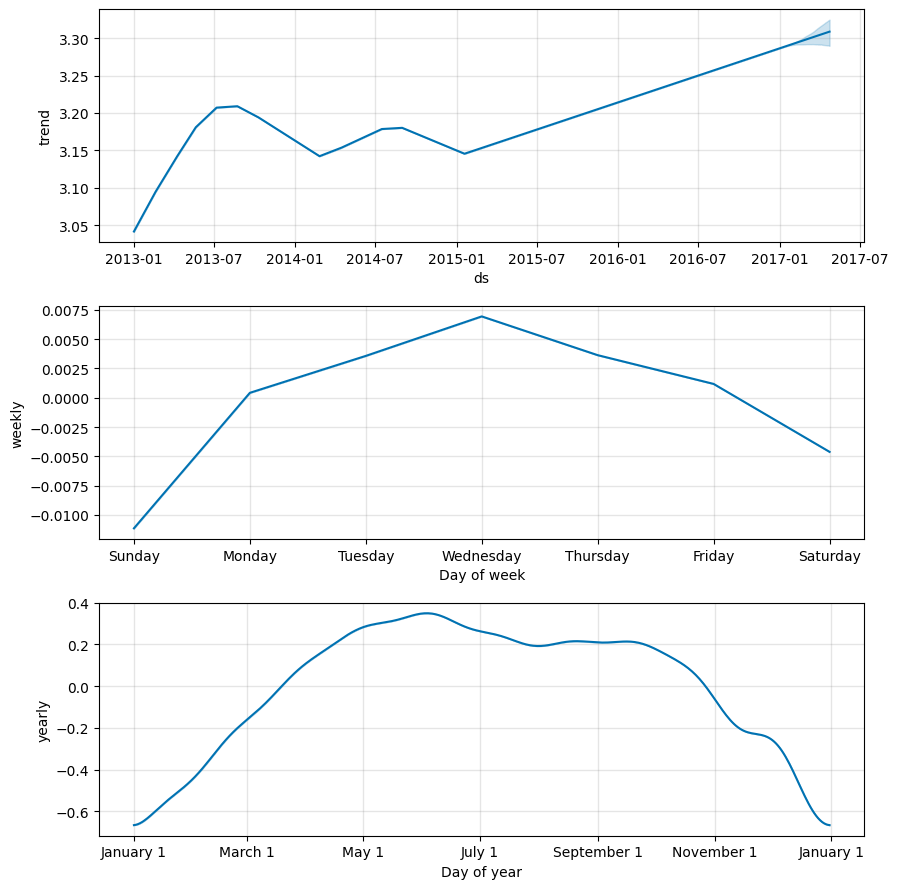

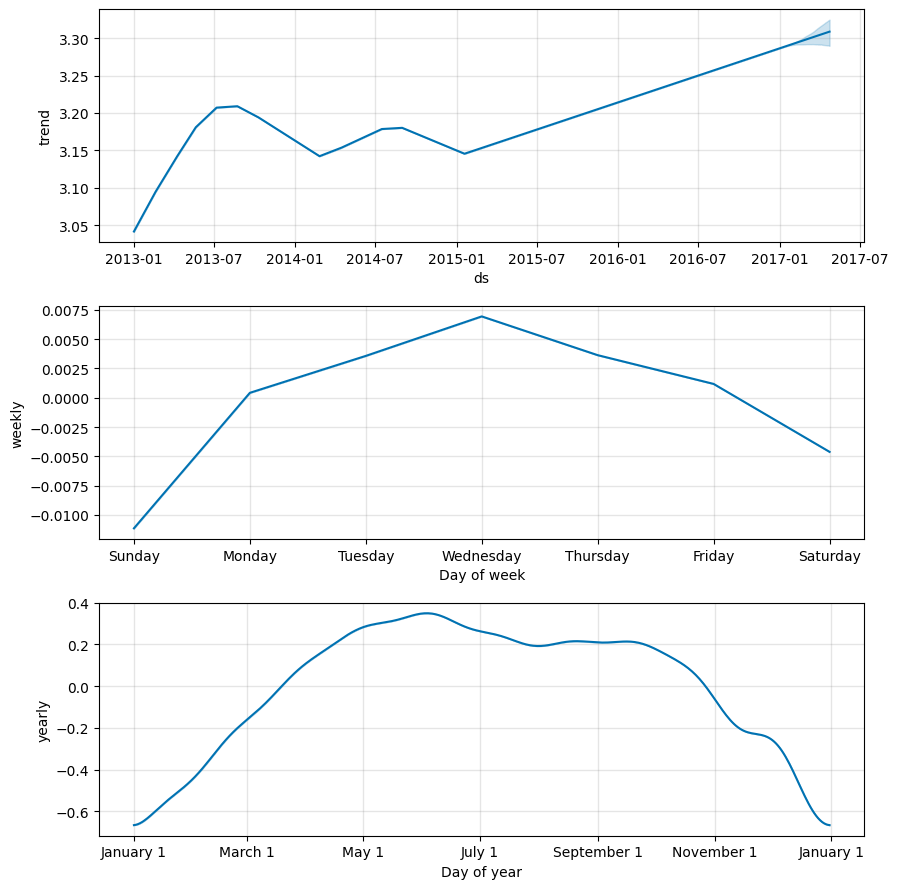

In [35]:
model.plot_components(forecast_data_new)

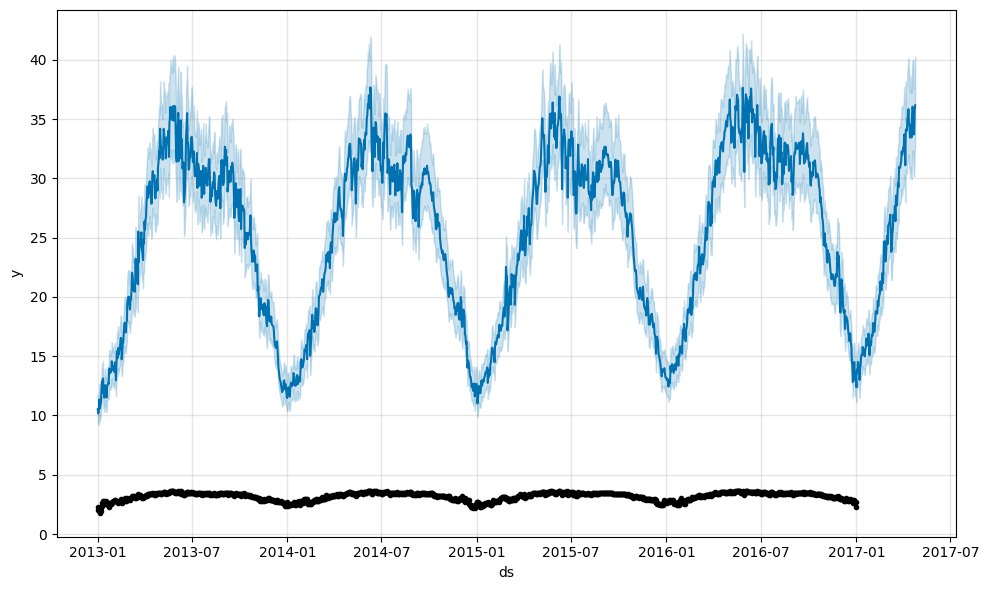

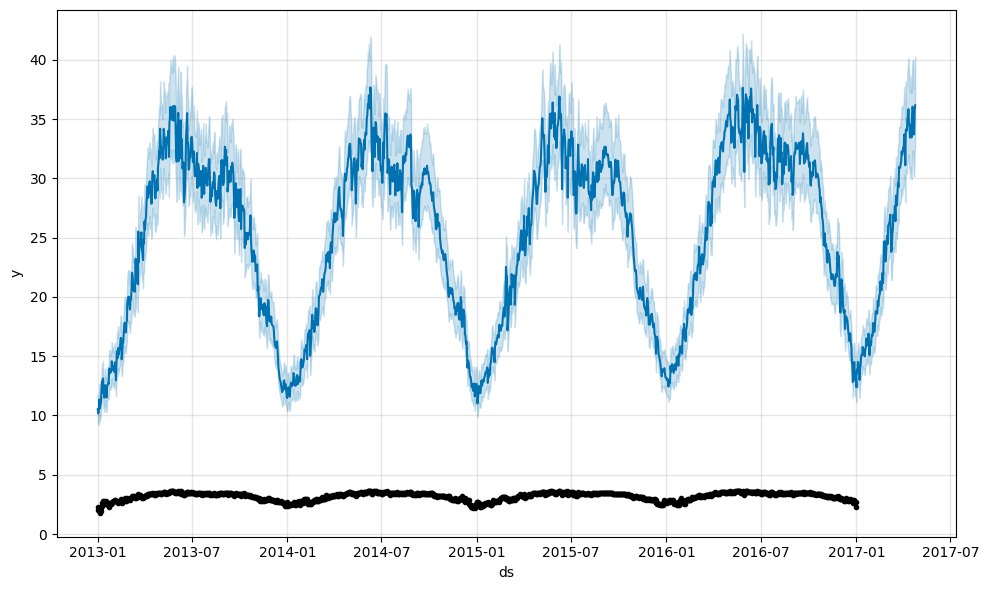

In [37]:
from plotly import data
forecast_data_orig_new=forecast_data_new
forecast_data_orig_new['yhat']=np.exp(forecast_data_orig_new['yhat'])
forecast_data_orig_new['yhat_lower']=np.exp(forecast_data_orig_new['yhat_lower'])
forecast_data_orig_new['yhat_upper']=np.exp(forecast_data_orig_new['yhat_upper'])
model_new.plot(forecast_data_orig_new)

In [38]:
df_train['y_log']=df_train['y']
df_train['y']=df_train['y_orig']

In [42]:
final_df=pd.DataFrame(forecast_data_orig_new)
actual_chart_new=go.Scatter(y=df_train["y_orig"],name='Actual')
predicted_chart_new=go.Scatter(y=final_df["yhat"],name='Predicted')
predict_chart_upper_new=go.Scatter(y=final_df["yhat_upper"],name='Predicted Upper')
predict_chart_lower_new=go.Scatter(y=final_df["yhat_lower"],name='Predicted Lower')
py.plot([actual_chart_new,predicted_chart_new,predict_chart_upper_new,predict_chart_lower_new])

'temp-plot.html'